використовуємо дані за Топ-50 рейтингом книг, що найбільше продаються на Amazon за 11 років (з 2009 по 2019). Датасет знаходиться у відкритому доступі на Kaggle.com. 

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


books = pd.read_csv("bestsellers with categories.csv")
books

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


Виведіть перші п'ять рядків (використовується функція head)

In [89]:
books.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


Виведіть розміри датасету (використовуйте атрибут shape)

In [60]:
books.shape

(550, 7)

In [92]:
print(f"Про скільки книг зберігає дані датасет? Відповідь: - {books['Name'].unique().shape[0]}")

Про скільки книг зберігає дані датасет? Відповідь: - 351


Для спрощення подальшої роботи давайте трохи підправимо назви змінних. Як бачите, тут усі назви починаються з великої літери, а одна - навіть містить пробіл. Це дуже небажано і може бути досить незручним. Давайте змінимо регістр на малий, а пробіл замінимо на нижнє підкреслення (snake_style).

In [93]:
books.rename(
    columns={
        "Name": "name",
        "Author": "author",
        "User Rating": "user_rating",
        "Reviews": "reviews",
        "Price": "price",
        "Year": "year",
        "Genre": "genre",
    },
    inplace=True,
)
books

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)

In [94]:
missing_data = books.isna().sum(axis=0)
missing_data

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

Відповідь: Чи є в якихось змінних пропуски? (Так / ні)   - Ні

Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

In [66]:
books.genre.unique()

array(['Non Fiction', 'Fiction'], dtype=object)

Відповідь: Які є унікальні жанри?         - 'Non Fiction', 'Fiction'

Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

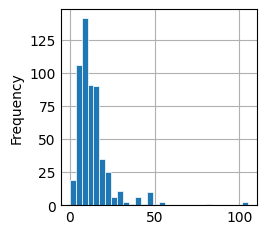

In [71]:
fig, ax = plt.subplots()
ax = books.price.plot(kind='hist', bins=30, linewidth=0.5, edgecolor="white", grid=True)

plt.show()

Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

In [76]:
print(f"Відповідь: Максимальна ціна? - {books.price.max()}")
print(f"Відповідь: Мінімальна ціна? {books.price.min()}")
print(f"Відповідь: Середня ціна? - {books.price.mean()}")
print(f"Відповідь: Медіанна ціна? - {books.price.median()}")

Відповідь: Максимальна ціна? - 105
Відповідь: Мінімальна ціна? 0
Відповідь: Середня ціна? - 13.1
Відповідь: Медіанна ціна? - 11.0


# Пошук та сортування даних

In [77]:
print(f"Який рейтинг у датасеті найвищий? Відповідь:- {books.user_rating.max()}")

Який рейтинг у датасеті найвищий? Відповідь:- 4.9


In [95]:
print(f"Скільки книг мають такий рейтинг? Відповідь:- {books.name[books.user_rating == books.user_rating.max()].unique().shape[0]}")

Скільки книг мають такий рейтинг? Відповідь:- 28


In [98]:
# books.groupby
# print(f"Яка книга має найбільше відгуків? Відповідь:- {books.name[books.reviews == books.reviews.max()]}")